In [13]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer, execute

import copy
from math import pi

from qiskit.tools.qi.qi import outer
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
from qiskit.tools.visualization import iplot_histogram, iplot_state_city, iplot_bloch_multivector, iplot_state_paulivec, iplot_state_hinton, iplot_state_qsphere

In [2]:

style = {'cregbundle': True, 'usepiformat': True, 'subfontsize': 12, 'fold': 100, 'showindex': True,
         'backgroundcolor': '#fffaff',
         "displaycolor": { # Taken from qx_color_scheme() in _circuit_visualization.py
            "id": "#ffca64",
            "u0": "#f69458",
            "u1": "#f69458",
            "u2": "#f69458",
            "u3": "#f69458",
            "x": "#a6ce38",
            "y": "#a6ce38",
            "z": "#a6ce38",
            "h": "#00bff2",
            "s": "#00bff2",
            "sdg": "#00bff2",
            "t": "#ff6666",
            "tdg": "#ff6666",
            "rx": "#ffca64",
            "ry": "#ffca64",
            "rz": "#ffca64",
            "reset": "#d7ddda",
            "target": "#00bff2",
            "meas": "#f070aa"}}

In [92]:
# working deutsch implementation
dq = QuantumRegister(3, 'q')
dc = ClassicalRegister(3, 'c')

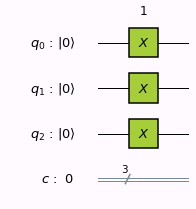

In [94]:
dcirc = QuantumCircuit(dq, dc)

dcirc.x(dq)
dcirc.draw(output="mpl", style=style)

In [62]:
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')

In [63]:
circ = QuantumCircuit(q, c)

In [83]:
circ = QuantumCircuit(q, c)


circ.x(q[0])
circ.x(q[1])

circ.x(q[2])


circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])

# circ.y(q[0])

# circ.h(q[2])
circ.cx(q[0], q[1])
# circ.h(q[2])

# circ.x(q[0])
# circ.x(q[1])

# circ.x(q[0])
# circ.x(q[1])

# circ.y(q[2])
# circ.y(q[3])

circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])

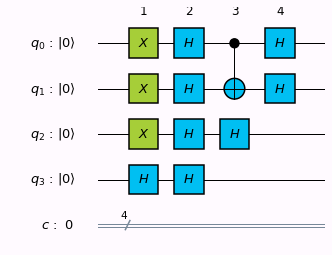

In [84]:
circ.draw(output="mpl", style=style)

In [85]:
#Adding Measurement gates to circuit
meas = QuantumCircuit(q,c)
meas.measure(q[0], c[0])
meas.measure(q[1], c[1])
meas.measure(q[2], c[2])
meas.measure(q[3], c[3])
qc = circ + meas

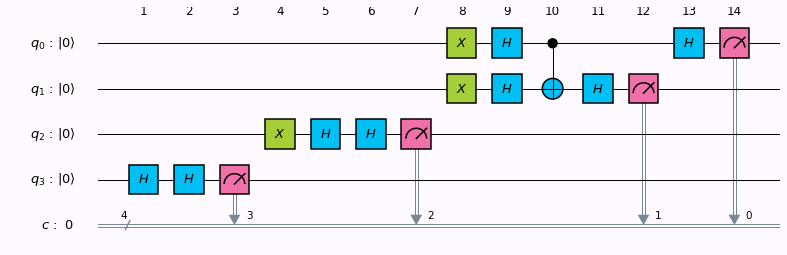

In [86]:
qc.draw(output="mpl", style=style)

{'0110': 1000}


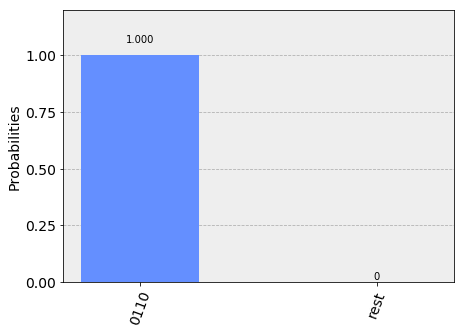

In [87]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend_sim, shots=1000).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts, number_to_keep=4)

In [20]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

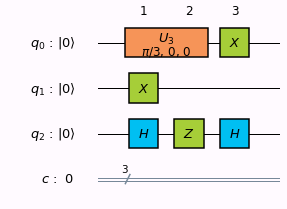

In [45]:
sv_backend = BasicAer.get_backend('statevector_simulator')
hcv = QuantumCircuit(q, c)

hcv.u3(pi/3, 0, 0, q[0])
hcv.x(q[0])

# hcv.u3(pi/3, 0, 0, q[1])
# hcv.y(q[1])

# hcv.u3(pi/3, 0, 0, q[2])
# hcv.z(q[2])

hcv.x(q[1])

hcv.h(q[2])
hcv.z(q[2])
hcv.h(q[2])



hcv.draw(output="mpl", style=style)

In [46]:
unt_hcv = copy.deepcopy(hcv)
hv_job = execute(unt_hcv, sv_backend).result()


In [47]:
#Uncomment to see Bloch Sphere

rho = outer(hv_job.get_statevector())
iplot_bloch_multivector(rho)